# Estructura de bandas y densidad de estados.

### Nieto Castellanos Jaime Fabián 
### Rave Franco Geovanny Alexander

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class Red(object):
    """Clase que representa una red (retícula)
    
    Esencialmente, es un arreglo de tres vectores. Se asume que las unidades son Angstrom.
    
    """
    
    # Las clases tienen instancias y métodos.
    # El primer método que se necesita es un inicializador
    def __init__(self, a1, a2, a3):
        """
        Crear una red a partir de tres vectores. Se asume que las unidades son Angstrom.
        
        Argumentos:
          a1, a2, a3 -> vectores (arreglos de numpy)
        """
        m = np.array([a1,a2,a3], dtype=np.float64).reshape((3, 3))
        lengths = np.sqrt(np.sum(m ** 2, axis=1))
        angles = np.zeros(3)
        for i in range(3):
            j = (i + 1) % 3
            k = (i + 2) % 3
            angles[i] = np.dot(m[j], m[k]) / (lengths[j] * lengths[k])
            
        # Los siguientes son atributos de la clase.
        # De forma convencional, el guión bajo se usa cuando no se espera que el usuario use estos atributos
        self._angles = np.arccos(angles) * 180. / np.pi
        self._lengths = lengths
        self._matrix = m
        self._a1 = np.array(a1)
        self._a2 = np.array(a2)
        self._a3 = np.array(a3)
        
    # Luego se pueden implementar propiedades 
    
    @property
    def angles(self):
        """
        Ángulos (alpha, beta, gamma) de la red.
        """
        return tuple(self._angles)

    @property
    def a(self):
        """
        Parámetro de red a
        """
        return self._lengths[0]

    @property
    def b(self):
        """
        Parámetro de red b
        """
        return self._lengths[1]

    @property
    def c(self):
        """
        Parámetro de red c
        """
        return self._lengths[2]
    
    @property
    def a1(self):
        return self._a1
    
    @property
    def a2(self):
        return self._a2
    
    @property
    def a3(self):
        return self._a3

    @property
    def abc(self):
        """
        Longitudes de los vectores de red, i.e. (a, b, c)
        """
        return tuple(self._lengths)
        
    # También se pueden implementar métodos.
    
    def plot (self,ax):
        """
        Incluye los vectores de red en el gráfico ax
        
        Argumentos:
            ax -> un eje con proyección 3d
        """
        Axes3D.plot3D(ax,[0,self._a1[0]],[0,self._a1[1]],[0,self._a1[2]],'k')
        Axes3D.plot3D(ax,[0,self._a2[0]],[0,self._a2[1]],[0,self._a2[2]],'k')
        Axes3D.plot3D(ax,[0,self._a3[0]],[0,self._a3[1]],[0,self._a3[2]],'k')
        Axes3D.grid(ax,False)
        
    def get_supercell(self, repetitions, with_plot=False, ax=None,centered =False):
        """
        Construye supercelda según la lista de enteros en repetitions
        """
        if centered:
            repx = repetitions[0]
            repy = repetitions[1]
            repz = repetitions[2]
        
            pts = np.zeros([(2*repx+1)*(2*repy+1)*(2*repz+1),3])
            ctr = 0
            for ix in range(-repx, repx+1):
                for iy in range(-repy, repy+1):
                    for iz in range(-repz, repz+1):
                        pts[ctr,:]= ix*self._a1+iy*self._a2 +iz*self._a3 
                        ctr+=1
        else:
            repx = repetitions[0]
            repy = repetitions[1]
            repz = repetitions[2]
        
            pts = np.zeros([(repx+1)*(repy+1)*(repz+1),3])
            ctr = 0
            for ix in range(repx+1):
                for iy in range(repy+1):
                    for iz in range(repz+1):
                        pts[ctr,:]= ix*self._a1+iy*self._a2 +iz*self._a3 
                        ctr+=1
        
        if with_plot:
            self.plot_supercell(ax,pts)
        
        return pts
        
    def plot_supercell (self,ax, pts):
        """
        Incluye los vectores de red en el gráfico ax
        
        Argumentos:
            ax -> un eje con proyección 3d
        """
        npts=np.shape(pts)[0]
        for i in range(npts):
            ax.scatter(pts[i,0],pts[i,1],pts[i,2], c='0.55', s=20)
            
        
        
        
    def get_wigner_seitz (self, plot=False, ax=None):
        """
        Construye la celda de Wigner Seitz
        
        Regresa los vértices
        """
        #forma sencilla (usando hint de Raúl)
        from scipy.spatial import Voronoi, voronoi_plot_2d

        pts = self.get_supercell([1,1,1], centered = True)
        
        v = Voronoi(pts)
        idx = -1
        for i in range(len(v.regions)):
            try:
                if v.regions[i][0] >= 0 :
                    idx = i
            except:
                print ('no elements')
        
        if idx < 0 :
            print ('No se pudo encontrar la celda de WS')
        else:
            ver = v.vertices[v.regions[idx]]
        
        if plot:
            max_length=1.1*np.max(self.abc)
            nats = len(ver)
            coords = ver
            d0 = []
            for iat in range(nats):
                for jat in range(iat,nats):
                    dist = np.linalg.norm(coords[jat,:]-coords[iat,:])
                    if dist > 0:
                        d0.append(dist)
            d0 =np.array(d0)
            
            max_length = 1.1*np.min(d0)
            
            for iat in range(nats):
                for jat in range(iat,nats):
                    dist = np.linalg.norm(coords[jat,:]-coords[iat,:])
                    if (dist <= max_length):
                        Axes3D.plot3D(ax,[coords[iat,0],coords[jat,0]],[coords[iat,1],coords[jat,1]]
                                      ,[coords[iat,2],coords[jat,2]],'g--')
        
        return ver

In [3]:
class Base_atomica (object):
    """
    Clase que determina la base atómica de un cristal con base en una lista de coordenadas y una lista de elementos
    """
    # Las clases tienen instancias y métodos.
    # El primer método que se necesita es un inicializador
    def __init__(self, coords, elements, coords_relative=True):
        """
        Crear una base atómica a partir de una lista de coordenadas y de átomos 
        Se asume por ausencia que las posiciones están dadas en coordenadas relativas
        
        Argumentos:
          coords -> arreglo de coordenadas (vectores)
          elements -> lista de elementos
          coords_relative -> BOOL (True por descarte)
        """
        coor = np.array(coords, dtype=np.float64)
        
        nats = np.shape(coor)[0]
        if ( len(elements) != nats):
            print ('Error: El número de elemntos y el número de átomos (coordenadas) debe ser el mismo')
                   
        self.coords = coor
        self.elements = elements
        self.nats = nats
        self.relative = coords_relative
        
    def son_relativas(self):
        return self.relative
    
    def get_number_of_atoms(self):
        return self.nats
    
    def plot(self, ax):
        nats = self.nats
        for i in range(self.nats):
            ax.scatter(self.coords[i,0],self.coords[i,1],self.coords[i,2], c='b', s=60)
        

In [4]:
class Cristal(object):
    """
    Clase que determina un cristal con base en una red y una base atómica
    """
    # Las clases tienen instancias y métodos.
    # El primer método que se necesita es un inicializador
    def __init__(self,red,base):
        """
        Crear un cristal a partir de una red y una base atómica
        
        Argumentos:
          red -> Instancia de la clase Red
          base -> Instancia de la clase Base_atomica
        """
        if type(red) != Red:
            print ('Error: debes especificar un objeto Red como entrada')
        if type(base) != Base_atomica:
            print ('Error: debes especificar un objeto Base_atomica como entrada')
        
        if base.son_relativas():
            coords = base.coords
        else:
            coords = np.zeros((base.nats,3))
            for i in range(base.nats):
                coords[i] = np.linalg.solve(red._matrix, base.coords[i])
        
        self.cart_coords = np.zeros((base.nats,3))
        
        for i in range(base.nats):
            self.cart_coords[i,:] = coords[i,0]*red._a1 + coords[i,1]*red._a2+coords[i,2]*red._a3
            
        self.relative = coords
        self.base = Base_atomica(coords, base.elements)
        self.red = Red (red._a1,red._a2,red._a3)
        self.reciprocal = 2*np.pi*(np.linalg.inv(red._matrix)).T
        
        
        
        
    def plot(self,ax,max_length=2.0):
        base_cart = Base_atomica(self.cart_coords, self.base.elements)
        base_cart.plot(ax)
        self.red.plot(ax)
        self.dibuja_enlaces(ax,max_length=max_length)
        
    def dibuja_enlaces(self,ax, max_length=2.0):
        #max_length=0.5*self.red.a
        nats = self.base.nats
        coords = self.cart_coords
        for iat in range(nats):
            for jat in range(iat,nats):
                dist = np.linalg.norm(coords[jat,:]-coords[iat,:])
                if (dist <= max_length):
                    Axes3D.plot3D(ax,[coords[iat,0],coords[jat,0]],[coords[iat,1],coords[jat,1]]
                                  ,[coords[iat,2],coords[jat,2]],'r')
    
    def get_supercell(self,rep):
        pts = self.red.get_supercell(rep)
        cart_coords = self.cart_coords
        new_coords = []
        new_specs = []
        for i  in range(len(pts)):
            for iat in range(self.base.nats):
                new_coords.append(cart_coords[iat,:]+pts[i,:])
                new_specs.append(self.base.elements[iat])
        
        a1 = rep[0]*self.red._a1
        a2 = rep[1]*self.red._a2
        a3 = rep[2]*self.red._a3
          
        newred = Red(a1,a2,a3)
        newbase = Base_atomica(new_coords,new_specs,coords_relative=False)
        newcristal = Cristal(newred,newbase)
        return newcristal
    
    
    def get_reciprocal(self):
        return self.reciprocal
        
    def get_brillouin_zone(self, with_plot=False, ax=None):
        rec = Red(self.reciprocal[0,:],self.reciprocal[1,:],self.reciprocal[2,:])
        if with_plot:
            bz = rec.get_wigner_seitz(plot=True, ax=ax)
        else:
            bz = rec.get_wigner_seitz()
        return bz
    

    def get_atoms_WS(self, with_plot = False, ax=None):
        """
        Aquí se sigue la definición de la primera celda de Wigner Seitz que contiene
        el conjunto de puntos que están más cerca al origen que a cualquier otro punto de la red
        """
        pts = self.red.get_supercell([2,2,2], centered = True)
        cart_coords = self.cart_coords
        new_coords = []
        new_specs = []
        for i  in range(len(pts)):
            for iat in range(self.base.nats):
                new_coords.append(cart_coords[iat,:]+pts[i,:])
                new_specs.append(self.base.elements[iat])
        
        new_coords = np.array(new_coords)
        nats = np.shape(new_coords)[0]
        if with_plot:
            ver_ws = self.red.get_wigner_seitz(plot=True, ax=ax)
        else:    
            ver_ws = self.red.get_wigner_seitz()
        d0 = 0.
        for iver in range(len(ver_ws)):
            if np.linalg.norm(ver_ws[iver,:]) > d0 :
                d0 = np.linalg.norm(ver_ws[iver,:])
        #print d0
        at_ws =[]
        for iat in range(nats):
            dist = np.linalg.norm( new_coords[iat,:])
            if dist <= d0*1.2:
                at_ws.append(new_coords[iat,:])
                if with_plot :
                    ax.scatter(new_coords[iat,0],new_coords[iat,1],new_coords[iat,2], c='b', s=60)
        
        
        return at_ws
    
   ####################################################################################################
   ####################################Estructura de bandas############################################
   ####################################################################################################
    
    def dist_primer_v(self,ref,max_dist,tol):
        
        """
        Esta función encuentra la distancia a la cual están los primeros vecinos respecto a un átomo
        """
        #Las coordenadas de la base van a tener que ser cartesianas (coords)
        #ref es el punto respecto al cual se van a calcular los primeros vecinos (también en cartesianas)
        #max_dist es la máxima distancia hasta la cual el programa buscará a los vecinos más cercanos, en caso de ser muy pequeña
        #no se encontrará nada

        if max_dist<10*tol:
            print('De una distancia máxima más grande, la que colocó cae por debajo de la tolerancia')
        else:
            cart_coords = self.cart_coords
            R = np.arange(10*tol,max_dist+tol,tol) #Vamos revisando hasta la máxima distancia dando saltos de tol=1e-3
            for r in R:
                for i in range( len(cart_coords) ):
                    if abs(np.linalg.norm(cart_coords[i]-ref)-r)<=tol:               
                        return np.linalg.norm(cart_coords[i]-ref)
            
    def first_neigh(self,ref,max_dist,tol=1e-3,tipo_coords='Relativas'):
        #Esta función nos regresa las coordenadas relativas de los primeros vecinos, acomodándolos por elemento.
        #ref es un índice que nos denota un elemento de la base atómica. Redifinimos ref para que sea la
        #coordenada cartesiana asociada a ese elemento
        cart_coords = self.cart_coords
        ref = cart_coords[ref]
        vecinos = []
        for i in range(len(cart_coords)):
            if abs( np.linalg.norm(cart_coords[i]-ref) - self.dist_primer_v(ref,max_dist,tol) )<=tol:
                if tipo_coords == 'Cartesianas':
                    vecinos.append(cart_coords[i])
                elif tipo_coords == 'Relativas':
                    vecinos.append(self.relative[i])
        return vecinos
    
    
    def cos_dir(self,vecino):
        if np.linalg.norm(vecino) >= 1e-10:
            vecino = vecino/np.linalg.norm(vecino)
        return vecino
    
    def delta(self,i,j):
        if i==j:
            return 1
        else:
            return 0
        
    def slater_koster(self,vecino,orbitales,param):
        #parámetros Slater-Koster param = [Vss sigma, Vsp sigmaAt1, V pp sigma, V pp pi, Vsp sigmaAt2]
        
        vss_sigma, vpp_sigma, vpp_pi = param[0], param[2], param[3]
        A = {1,2,3}  #0 = s; 1 = px; 2=py; 3=pz
        directores = self.cos_dir(vecino)
        vsp_sigma1 = param[1]
        vsp_sigma2 = param[4]
        if orbitales[0] == 0  and orbitales[1]==0:
            return vss_sigma
        elif orbitales[0] in A and orbitales[1] in A:
            return (directores[orbitales[0]-1]*directores[orbitales[1]-1])*(vpp_sigma -vpp_pi)*(1 - self.delta(orbitales[0],orbitales[1])) + self.delta(orbitales[0],orbitales[1])*((directores[orbitales[0]-1])**2*vpp_sigma + (1-(directores[orbitales[0]-1])**2)*vpp_pi) 
       
        elif (orbitales[0] == 0 and orbitales[1]==1): 
            return directores[0]*vsp_sigma1  
        elif  (orbitales[1] == 0 and orbitales[0]==1):
            return directores[0]*vsp_sigma2
        
        elif (orbitales[0] == 0 and orbitales[1]==2): 
            return directores[1]*vsp_sigma1
        elif (orbitales[1] == 0 and orbitales[0]==2):
            return directores[1]*vsp_sigma2
        
        elif (orbitales[0] == 0 and orbitales[1]==3):  
            return directores[2]*vsp_sigma1
        elif (orbitales[1] == 0 and orbitales[0]==3):
            return directores[2]*vsp_sigma2
        
    def factor(self,ener_sitio,vecinos,orbitales,param,vektor,A,B,l,m):
        #vektor = vector k
        #orbitales = [] lista con todos los orbitales de los átomos de la base
        #param = parámetros de SK
        #l: orbital l
        #m: orbital m
        #A y B índices para átomos
        #contando l y m desde cero
        factor = 0
        orbital = [l,m]
        if A == B and l==m:
            return ener_sitio[A][l]
        elif A == B and l!=m:
            return factor
        elif A!=B and l<=m:
            for i in range(len(vecinos)):
                factor += np.exp( 1j*np.dot(vecinos[i],vektor)) * self.slater_koster(vecinos[i],orbital,param)
        elif A!=B and l>m:
            for i in range(len(vecinos)):
                factor += np.conjugate(np.exp( 1j*np.dot(-vecinos[i],vektor)) * self.slater_koster(-vecinos[i],orbital,param) ) 
        return factor
   
   
    def Hamiltonian_eig(self,vecinos,orbitales,param,vektor,ener_sitio):
        tamaño = 0
        for i in range(len(orbitales)):
            tamaño += len(orbitales[i])
        H = np.zeros((tamaño,tamaño),dtype=complex)
        #Los orbitales deben  de darse en orden orbitales=[['s','px','py','pz'],['s','px','py','pz']...]
        #y debe seguirse la notación s=0, px=1, py=1, pz=2
        #vecinos=self.first_neigh(ref,max_dist,tipo_coords='Cartesianas')
        #i indexa renglones del Hamiltoniano, j indexa columnas
        A=[] #Orbitales en una línea
        Atom = [] 
        for i in range(len(orbitales)):
            for j in range(len(orbitales[i])):
                A.append(orbitales[i][j])
                Atom.append(i)
        for i in range(len(Atom)):
            for j in range(len(Atom)):
                H[i,j]=self.factor(ener_sitio,vecinos,orbitales,param,vektor,Atom[i],Atom[j],A[i],A[j])
        return np.linalg.eigh(H)[0]
    
    def bandas(self,vecinos,orbitales,param,ener_sitio,camino,camino2,Continuidad):
        #camino son los puntos de alta simetría en coordenadas cartesianas
        #Si Continuidad=TRUE, sólo usaremos camino, en caso de que continuidad sea falso, usaremos camino, camino2
        #y "pegaremos" la estructura de bandas de los dos caminos.
        estructura = []
        if Continuidad==True: 
            for n in range(len(camino)-1):
                estructura.append([])
            for n in range(len(camino)-1):
                escala = np.linalg.norm(camino[n+1]-camino[n])
                T = np.linspace(escala,2*escala,100)
                for t in range(len(T)):
                    vektor =  (T[t]-escala)*(camino[n+1] - camino[n])/escala + camino[n]
                    if n!=0:
                        estructura[n].append([T[t]-escala + estructura[n-1][-1][0],self.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)])
                    else:
                        estructura[n].append([T[t]-escala,self.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)]) 
        else:
            for n in range(len(camino)+len(camino2)-2):
                estructura.append([])
            for n in range(len(camino)-1):
                escala = np.linalg.norm(camino[n+1]-camino[n])
                T = np.linspace(escala,2*escala,100)
                for t in range(len(T)):
                    vektor =  (T[t]-escala)*(camino[n+1] - camino[n])/escala + camino[n]
                    if n!=0:
                        estructura[n].append([T[t]-escala + estructura[n-1][-1][0],self.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)])
                    else:
                        estructura[n].append([T[t]-escala,self.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)]) 
            for n in range(len(camino2)-1):
                escala = np.linalg.norm(camino2[n+1]-camino2[n])
                T = np.linspace(escala,2*escala,100)
                for t in range(len(T)):
                    vektor =  (T[t]-escala)*(camino2[n+1] - camino2[n])/escala + camino2[n]
                    estructura[n+len(camino)-1].append([T[t]-escala + estructura[len(camino)+n-2][-1][0],self.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)])         
        return estructura
    
    def plot_bandas(self,vecinos,orbitales,param,ener_sitio,camino,names,camino2=[],Continuidad=True):
        bandas = self.bandas(vecinos,orbitales,param,ener_sitio,camino,camino2,Continuidad)
        t = []
        En = []
        puntos = [] #Coordenadas de los puntos de alta simetría en el eje x para poder marcarlos
        tamaño = 0
        if Continuidad==True:
            tamaño = len(camino)-1
        else:
            tamaño = len(camino)+len(camino2)-2
        for n in range(tamaño):
            for i in range(len(bandas[n])):
                En.append(bandas[n][i][1])
                t.append(bandas[n][i][0])  
        plt.plot(t,En,linewidth=0.5,color='m')
        for i in range(len(bandas)-1):
            plt.axvline(x=bandas[i][-1][0], linewidth=0.5, linestyle='--',color='k')
        for i in range(len(names)):
            if i == len(names)-1:
                puntos.append(bandas[i-1][-1][0])
            else:
                puntos.append(bandas[i][0][0]) 
        plt.xticks(puntos,names)
        
    def density(self,vecinos,orbitales,param,ener_sitio,x):
        primer=0
        segundo=0
        for i in range(31):
            for j in range(31):
                for k in range(31):
                    vektor= (i/31)*self.red.a1 + (j/31)*self.red.a2 + (k/31)*self.red.a3
                    for n in range(len(self.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio))):
                        primer+=np.exp(-10**4*0.5*(x-self.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)[n])**2)
                segundo+=primer
            
        rho= 10**2*(1/(2*np.pi))**(3+0.5)*segundo
        return rho
              
    def plot_density(self,vecinos,orbitales,param,ener_sitio):
        x=np.linspace(-10,10,1000)
        plt.plot(x,self.density(vecinos,orbitales,param,ener_sitio,x))
        plt.xlabel("Energía")
        plt.ylabel(r"$\rho(E)$")
        plt.title("Densidad de estados")
        
    @property
    def coords_rel(self):
        return self.relative
    
    @property
    def coords_cart(self):
        return self.cart_coords
    

### GaAs

In [5]:
a = 5.65325 #Parámetro de red de GaAs en angstroms 
redS = Red([0,a*0.5,a*0.5],[a*0.5,0,a*0.5],[a*0.5,a*0.5,0])
baseS = Base_atomica([[0,0,0],[1/4,1/4,1/4]],['Ga','As'])
CristalS = Cristal(redS,baseS)
Base_reciproca = CristalS.get_reciprocal()
GC = CristalS.get_supercell([2,2,2])

In [6]:
G = np.array([0,0,0])
K = np.array([3/8, 3/4, 3/8])   
L = np.array([1/2, 1/2, 1/2])
U = np.array( [1/4, 5/8, 5/8])
W = np.array([1/4, 3/4, 1/2])
X = np.array([0, 1/2, 1/2])
Camino_rel1 = [L,G,X,U]  
Camino_rel2 = [K,G]
Camino1 = [] #Aquí vamos a guardar las coordenadas de los puntos de alta simetría en cartesianas
Camino2 = [] 
for i in range(len(Camino_rel1)):
    Camino1.append( Base_reciproca[0]*Camino_rel1[i][0] + Base_reciproca[1]*Camino_rel1[i][1] + Base_reciproca[2]*Camino_rel1[i][2] )
for i in range(len(Camino_rel2)):
    Camino2.append( Base_reciproca[0]*Camino_rel2[i][0] + Base_reciproca[1]*Camino_rel2[i][1] + Base_reciproca[2]*Camino_rel2[i][2] ) 
Nombres = [r'$L$',r'$\Gamma$',r'$X$',r'$U,K$',r'$\Gamma$']

In [7]:
Vss_sigma = -1.645080
Vsp_sigma1 = 2.664930 #Recordemos que tenemos dos valores de Vsp_sigma
Vsp_sigma2 = 2.960320
Vpp_sigma = 4.150800
Vpp_pi = -1.427440
param = [Vss_sigma, Vsp_sigma1, Vpp_sigma, Vpp_pi,Vsp_sigma2]
#Orbitales: 0=s, 1=px, 2=py, 3=pz
orbitales = np.array([[0,1,2,3],[0,1,2,3]])
ener_sitio = np.array([[-5.500420,4.151070,4.151070,4.151070],[-0.241190,6.707760,6.707760,6.707760]]) #Es=-4.15  EP=3.05eV tomar estos valores para escalar bien el cero
vecinos = 0.25*a*np.array([[1,1,1],[-1,1,-1],[1,-1,-1],[-1,-1,1]])

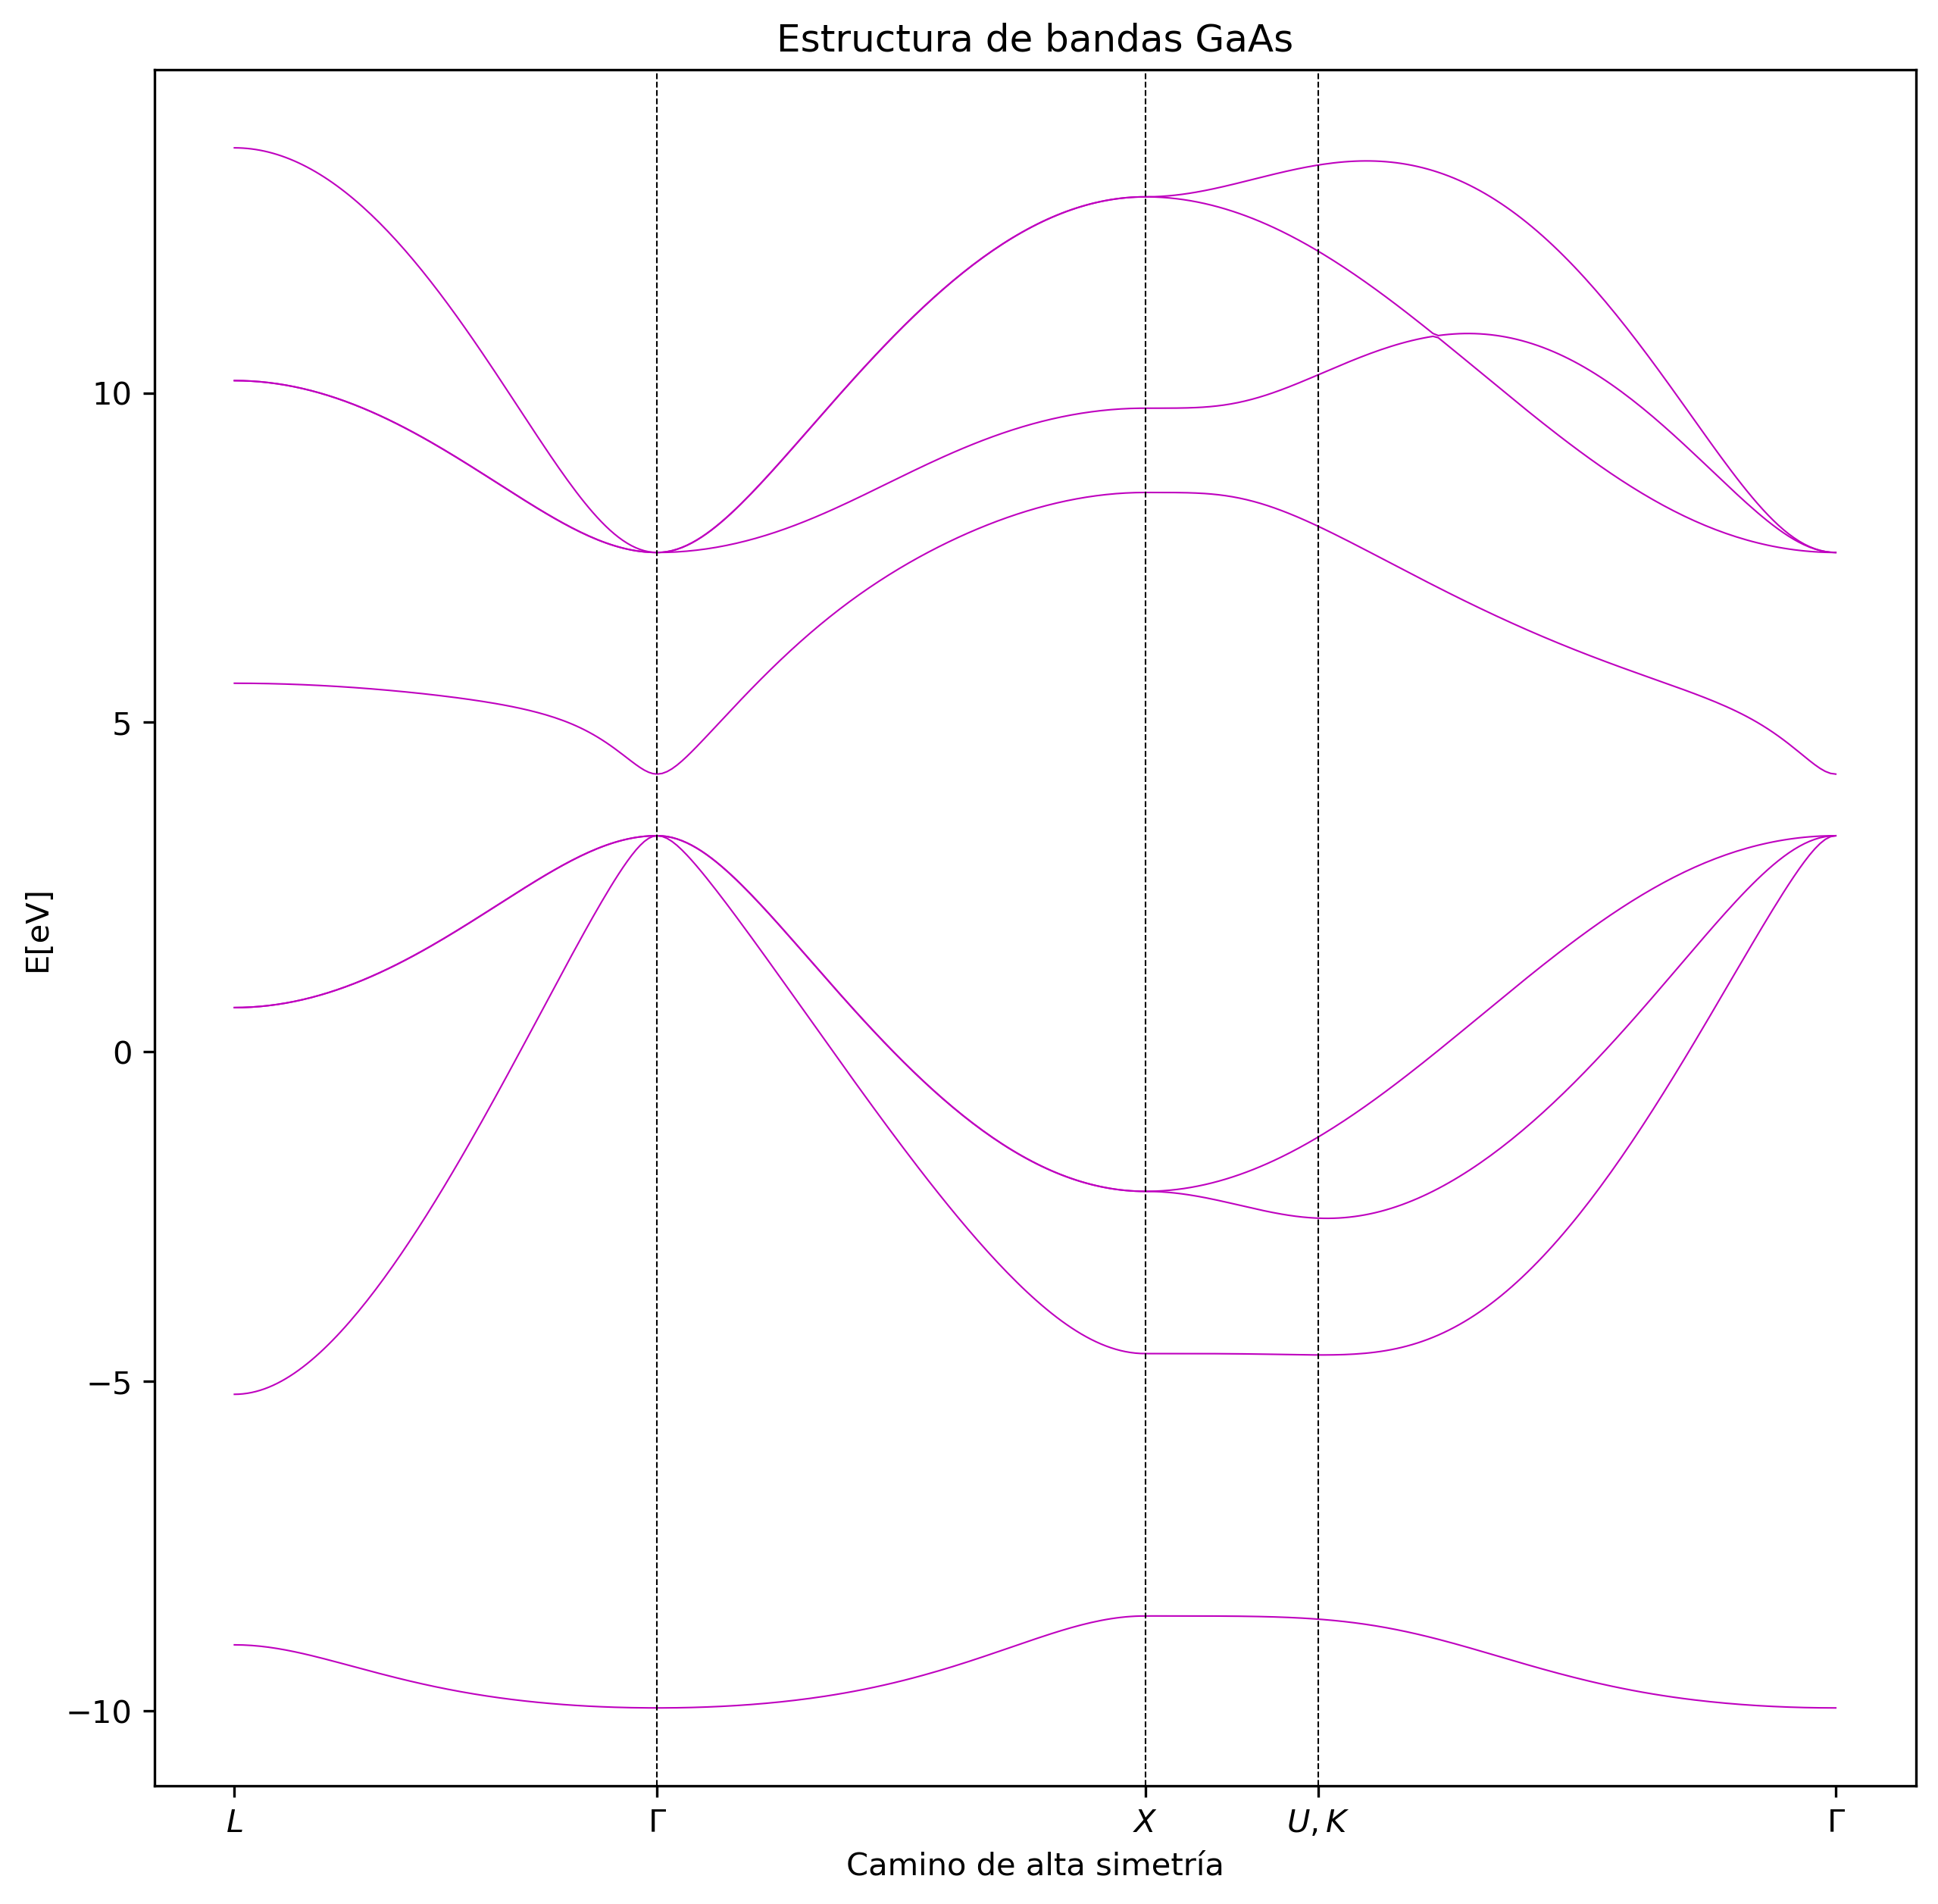

In [8]:
fig = plt.figure(figsize=(10,10),dpi=300)
GC.plot_bandas(vecinos,orbitales,param,ener_sitio,Camino1,Nombres,Camino2,Continuidad=False)
plt.title('Estructura de bandas GaAs')
plt.xlabel('Camino de alta simetría')
plt.ylabel('E[eV]')
plt.show()
#fig.savefig('GaAsBandas.png')

In [9]:
path = np.array([Camino1[0],Camino1[1],Camino1[2]])
EB = GC.bandas(vecinos,orbitales,param,ener_sitio,path,[],Continuidad=True)

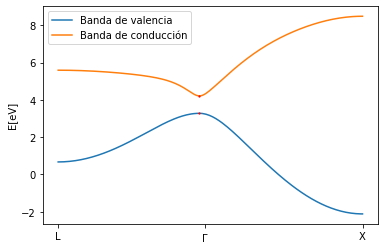

In [10]:
Banda1 = []
Banda2 = []
Banda3 = []
k = []
#EB[Parte del camino de alta simetría, e.g. de gamma a X][Arreglo con k y eigenvalores][arreglo con eigenvalores][eigenvalor 
#particular]
for i in range(len(EB[0])):
    Banda1.append(EB[0][i][1][3])
    Banda2.append(EB[0][i][1][4])
    k.append(EB[0][i][0])  
for i in range(len(EB[1])):
    Banda1.append(EB[1][i][1][3]) #Esta es la de valencia
    Banda2.append(EB[1][i][1][4]) #Esta es la de conducción
    k.append(EB[1][i][0])  
#fig = plt.figure(dpi=300)
plt.plot(k,Banda1,label='Banda de valencia')
plt.plot(k,Banda2,label='Banda de conducción')
plt.plot(k[len(EB[0])-1],Banda1[len(EB[0])-1],'ro',markersize=1.2)
plt.plot(k[len(EB[0])-1],Banda2[len(EB[0])-1],'ro',markersize=1.2)
plt.xticks([0,1,k[-1]],['L',r'$\Gamma$','X'])
plt.ylabel('E[eV]')
plt.legend()
plt.show()
#fig.savefig('BVBC.png')

In [11]:
Bv = np.array(Banda1)
Bc = np.array(Banda2)

In [12]:
pi = np.pi
A1 = np.array([2*pi/a,0,0])
A2 = np.array([0,2*pi/a,0])
A3 = np.array([0,0,2*pi/a])
def epsilon2(vecinos,orbitales,param,ener_sitio,En,sigma):
    a = 5.65325 
    eps=np.zeros(len(En))
    hbar, hbar_c, alfa, m = 6.582119624e-16, 197.3269804*1e6, 1/137, 511e3
                                    #eV.s            eV.fm                    me en eV
    cons = 2*hbar_c*alfa*pi**2/m
    diferencia = []
    for i in range(30):
        for j in range(30):
            for k in range(30):
                vektor= (i/30)*Base_reciproca[0] + (j/30)*Base_reciproca[1]+ (k/30)*Base_reciproca[2]
                Ev = GC.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)[3]
                Ec = GC.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)[4]
                diferencia.append(Ec - Ev)
    diferencia=np.array(diferencia)
    for i in range(len(En)):
        for j in range(len(diferencia)):
            eps[i] +=  cons*(hbar/En[i])**2 * (diferencia[j])* 1/( sigma*(np.sqrt(2*pi)) )* \
                np.exp( -( (diferencia[j] - En[i])**2 )/2 * 1/(sigma**2) )
    return eps

def epsilon1(vecinos,orbitales,param,ener_sitio,omega,sigma):
    pi = np.pi
    hbar, hbar_c, alfa, m = 6.582119624e-16, 197.3269804*1e6, 1/137, 511e3
    hbar = 1
    diferencia = []
    eps = np.zeros(len(omega))
    for i in range(30):
        for j in range(30):
            for k in range(30):
                vektor= (i/30)*Base_reciproca[0] + (j/30)*Base_reciproca[1]+ (k/30)*Base_reciproca[2]
                Ev = GC.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)[3]
                Ec = GC.Hamiltonian_eig(vecinos,orbitales,param,vektor,ener_sitio)[4]
                diferencia.append(Ec - Ev)
    diferencia=np.array(diferencia)
    for i in range(len(omega)):
        for j in range(len(diferencia)):
            eps[i] += 4*np.pi*alfa*hbar_c*(1/m)*hbar**2/(  diferencia[j]**2 - (omega[i])**2 )
        eps[i]+=1
    return eps

In [13]:
En = np.linspace(1,10,1000)
sigma  = 0.1
eps2=epsilon2(vecinos,orbitales,param,ener_sitio,En,sigma)

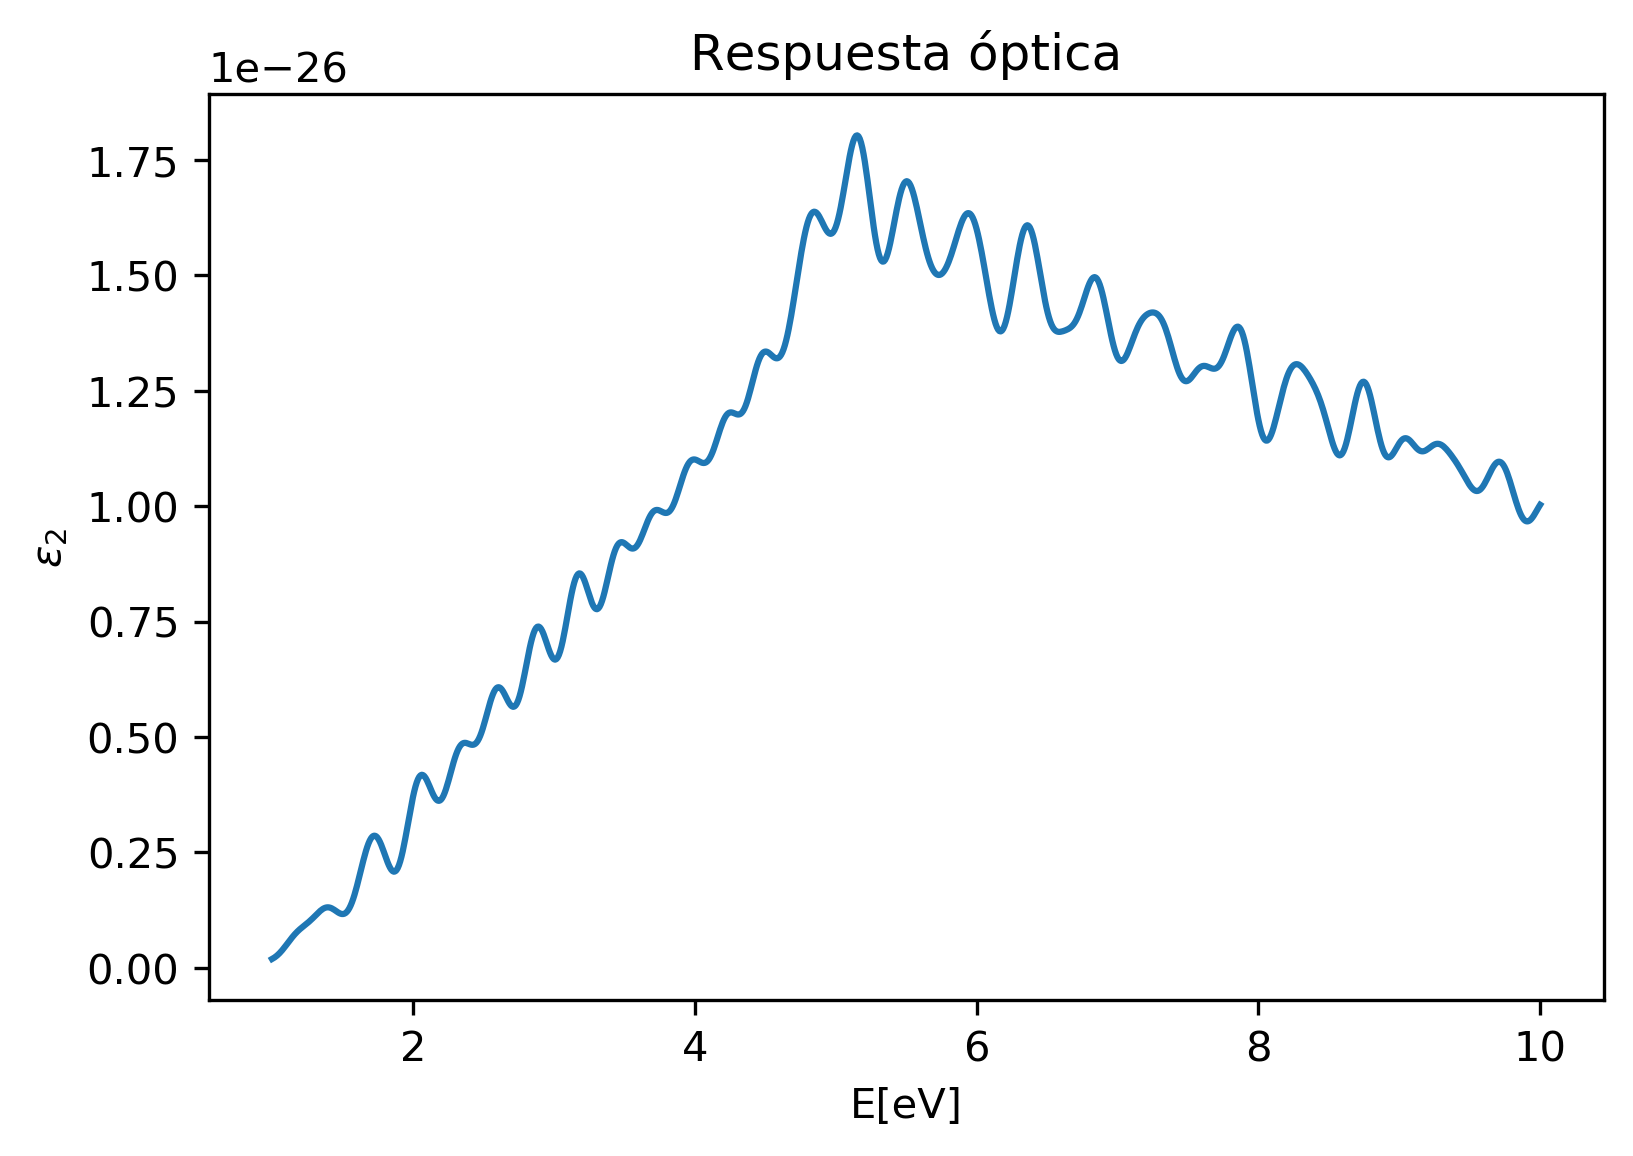

In [17]:
En = np.linspace(1,10,1000)
fig = plt.figure(dpi=300)
plt.plot(En,eps2)
plt.xlabel('E[eV]')
plt.ylabel(r'$\epsilon_{2}$')
plt.title('Respuesta óptica')
plt.show()
fig.savefig('UsandoCeldaBCC.pdf')

In [15]:
En = np.linspace(1,10,100)
sigma  = 0.1
eps1 = epsilon1(vecinos,orbitales,param,ener_sitio,En,sigma)

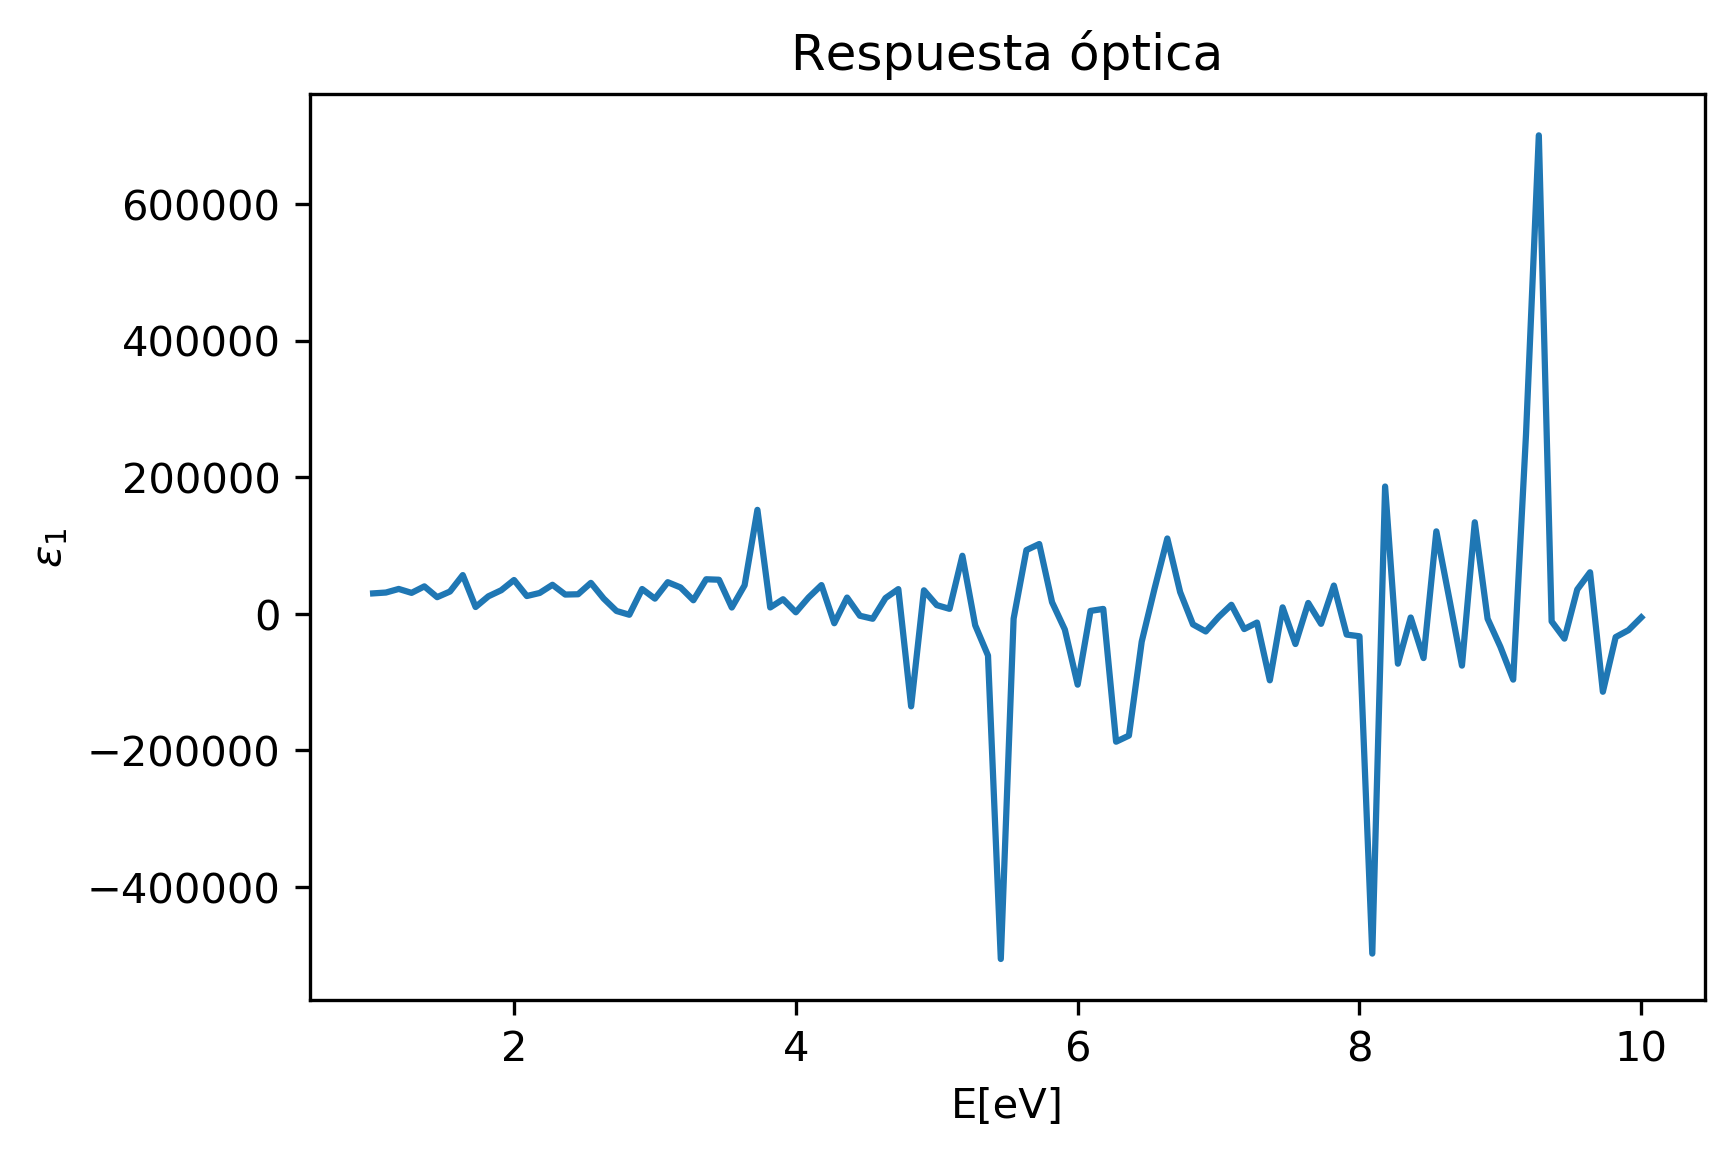

In [18]:
En = np.linspace(1,10,100)
fig = plt.figure(dpi=300)
plt.plot(En,eps1)
plt.xlabel('E[eV]')
plt.ylabel(r'$\epsilon_{1}$')
plt.title('Respuesta óptica')
fig.savefig('e1.pdf')
plt.show()